# Heart Problem Prediction

## Introduction
This notebook demonstrates a machine learning project to predict heart problems using a dataset. We will go through the steps of data preprocessing, exploratory data analysis, feature engineering, model training, evaluation, and making predictions.

## Import the libs and get to know the dataset

#### Let's understand some of the mertics of the dataset:
    age: Age of the patient (in years).
    sex: Gender of the patient (1 = male, 0 = female).
    cp (Chest Pain Type):
        0: Typical angina (direct heart-related pain).
        1: Atypical angina (indirect pain that may be felt in the heart).
        2: Non-anginal pain (not related to the heart).
        3: Asymptomatic (no symptoms).
    trtbps (Resting Blood Pressure): Resting blood pressure in mm Hg.
    chol (Cholesterol): Cholesterol level in mg/dL.
    fbs (Fasting Blood Sugar > 120 mg/dL):
        1: Fasting blood sugar > 120 mg/dL (diabetic).
        0: Fasting blood sugar ≤ 120 mg/dL (not diabetic).
    restecg (Resting Electrocardiogram Results):
        0: Normal.
        1: ST-T wave abnormality (irregular heartbeat).
        2: Probable or definite left ventricular hypertrophy (enlarged left ventricle).
    thalachh (Maximum Heart Rate Achieved): Maximum heart rate recorded during exercise.
    exng (Exercise-Induced Angina):
        1: Yes (chest pain triggered by exercise).
        0: No.
    oldpeak (ST Depression Induced by Exercise): ST segment depression during exercise relative to rest (a measure of heart stress).
    slp (Slope of the Peak Exercise ST Segment):
        0: Upsloping.
        1: Flat.
        2: Downsloping.
    caa (Number of Major Vessels): Number of major blood vessels visible in fluoroscopy (0–3).
    thall (Thalassemia): A blood disorder related to hemoglobin.
        1: Normal.
        2: Fixed defect.
        3: Reversible defect.
    output (Target Variable):
        0: Low chance of heart attack.
        1: High chance of heart attack.    


#### Feature Types:
    Numerical features: age, trtbps, chol, thalachh, oldpeak.
    Categorical features: sex, cp, fbs, restecg, exng, slp, caa, thall.


### Load the required libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load and understand the dataset

In [5]:
# load the dataset
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
print(df.describe)

<bound method NDFrame.describe of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  

In [9]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

## Data Preprocessing
Before we move on to the next steps we need to preprocess our data to make sure everything resonates with our needs and there are no mal-data in our dataset. 

In [ ]:
# correlation matrix of the dataset
correlation_matrix = df.corr()
print(correlation_matrix)

               age       sex        cp    trtbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trtbps    0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalachh -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exng      0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slp      -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
caa       0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thall     0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

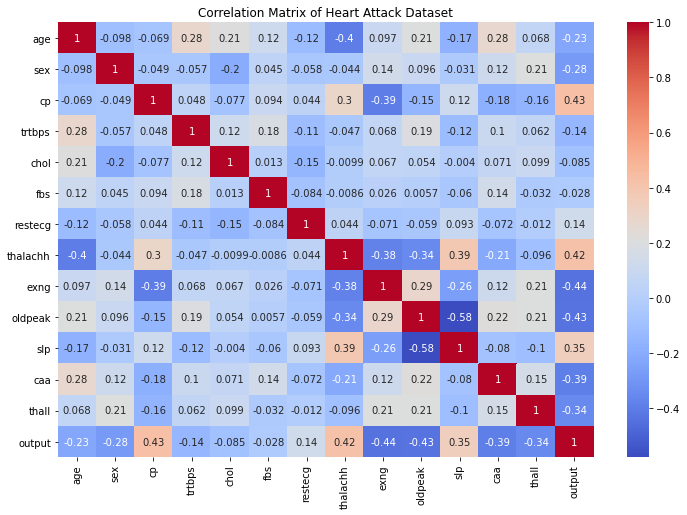

In [14]:
# visualize the correlation matrix of the dataset
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Heart Attack Dataset")

plt.show()

In [57]:
# Correlation of all features with the target variable
target_correlation = correlation_matrix['output'].sort_values(ascending=False)
print(target_correlation)

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64


So, what we understand from this data is that these are the most effective correlations:

| DF Name | Name  | Percentage   |
|------|------|------|
|   cp  | Chest Pain Type| 0.43 |
|   thalachh  | Maximum Heart Rate| 0.42|
|   slp  | Slope of ST Segment| 0.35|
|   exng  | Exercise-Induced Angina| -0.44|
|   oldpeak  | ST Depression| -0.43|
|   caa  | Number of Major Vessels| -0.39|
|   thall | Thalassemia| -0.34|

And the other correlations are weak, namely age, sex, trtbps, chol, fbs, and restecg.

In [ ]:
#Selecting the dataset we want to work on.
selected_df = df[['cp', 'thalachh', 'slp', 'exng', 'oldpeak',  'caa', 'thall', 'output']]

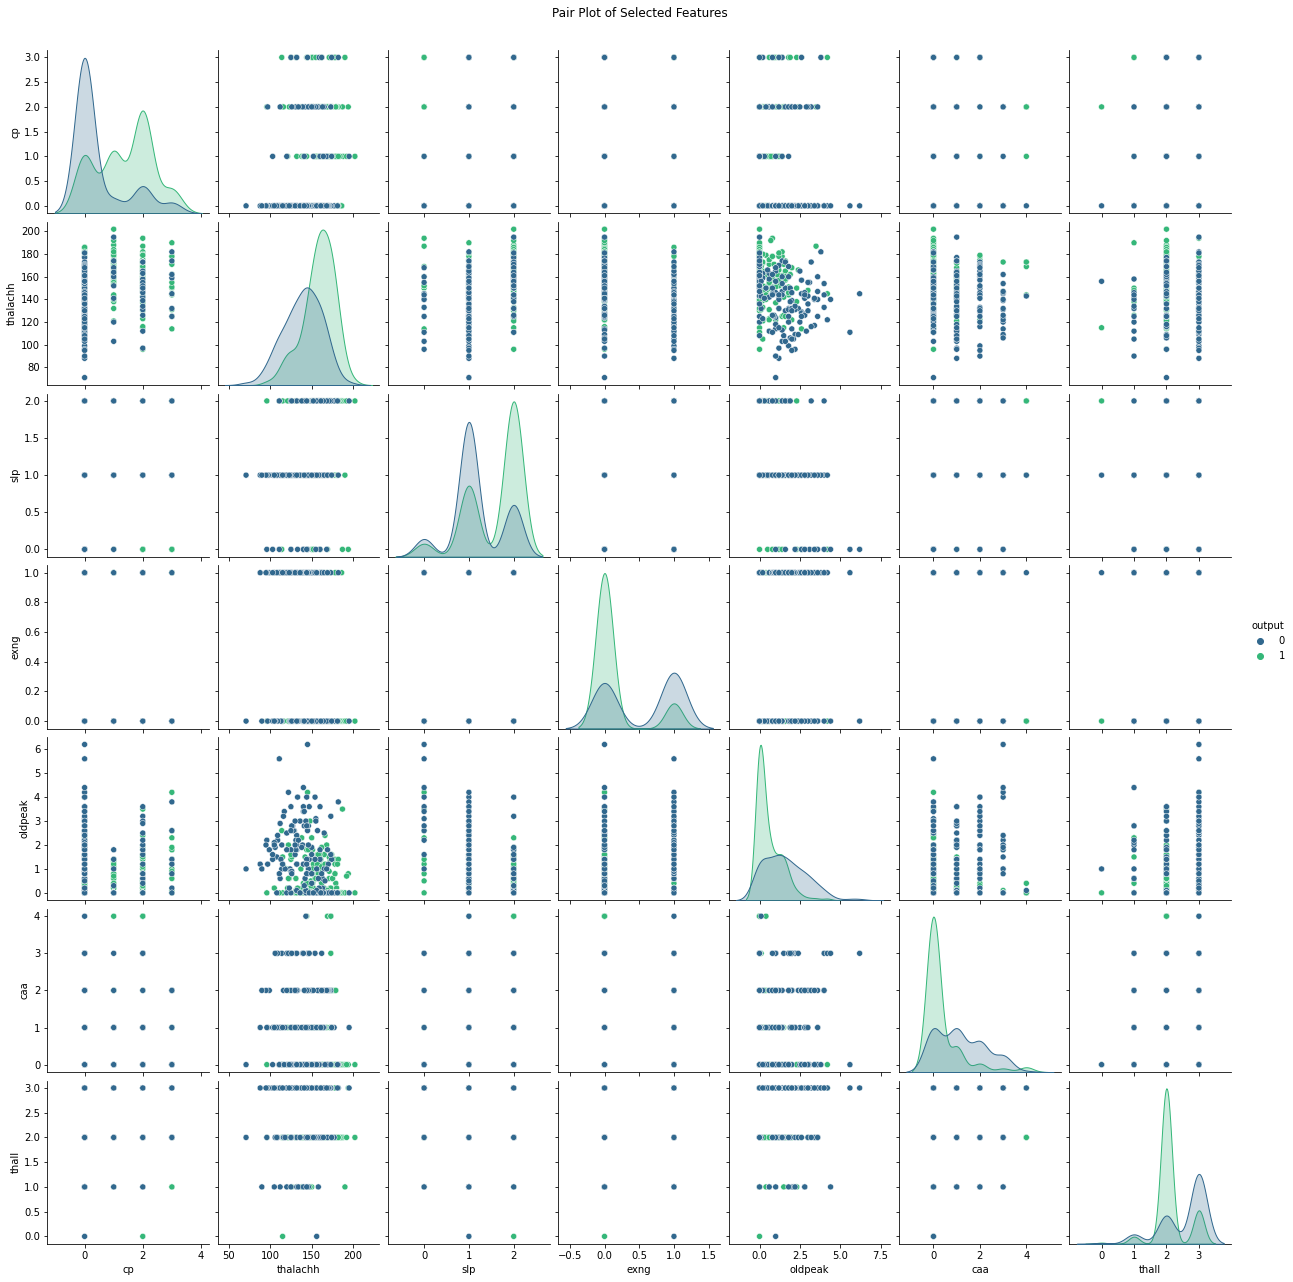

In [59]:
sns.pairplot(selected_df, hue='output', palette='viridis')
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

In [ ]:
X = np.asarray(selected_df.drop('output', axis=1))
y = np.asarray(selected_df['output'])
print(X)
print(y)

## Train-Test Split

In [64]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (242, 7)
Testing data shape: (61, 7)


## Train the Model

Here, we can also scale our X for better performance. (For SVM)

In [66]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

c:\Users\Mohamamd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

## Evaluate the Model

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

Accuracy: 0.8852459016393442
Precision: 0.8787878787878788
Recall: 0.90625
F1-Score: 0.8923076923076922
ROC-AUC Score: 0.8841594827586207


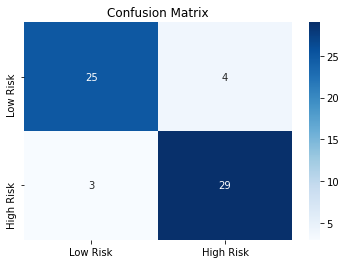

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC Score:", roc_auc)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Risk', 'High Risk'], yticklabels=['Low Risk', 'High Risk'])
plt.title("Confusion Matrix")
plt.show()

In [69]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.819672131147541
